In [1]:
import notebook_utils as nu

import sys
sys.path.append("/home/haotruong/Receipt/rece_digi/TextSnake.pytorch")

from demo import *

In [6]:
cfg.img_root = "/home/haotruong/Receipt/rece_digi/testdata"
cfg.save_dir = "/home/haotruong/Receipt/rece_digi/output"
cfg.vis_dir = "/home/haotruong/Receipt/rece_digi/vis"
cfg.exp_name = "vs"
cfg.device = 0
cfg.net = "vgg"
cfg.input_size=512

In [7]:
testset = DeployDataset(
    image_root=cfg.img_root,
    transform=BaseTransform(size=cfg.input_size, mean=cfg.means, std=cfg.stds)
)
test_loader = data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=cfg.num_workers)

In [8]:
# Model
model = TextNet(is_training=False, backbone=cfg.net)
model_path = "/home/haotruong/Receipt/rece_digi/textsnake_vgg_180.pth"
# model_path = os.path.join(cfg.save_dir, cfg.exp_name, \
#           'textsnake_{}_{}.pth'.format(model.backbone_name, cfg.checkepoch))
model.load_model(model_path)

# copy to cuda
model = model.to(cfg.device)
if cfg.cuda:
    cudnn.benchmark = True
detector = TextDetector(model, tr_thresh=cfg.tr_thresh, tcl_thresh=cfg.tcl_thresh)

print('Start testing TextSnake.')
output_dir = "/home/haotruong/Receipt/rece_digi/output"
inference(detector, test_loader, output_dir)

Loading from /home/haotruong/Receipt/rece_digi/textsnake_vgg_180.pth
Start testing TextSnake.
detect 0 / 147 images: c9b56e1b-cffe-485a-adc1-0a6a92484362.jpg. (1.23 fps)
detect 1 / 147 images: becfba9d-3cc4-4501-bd1d-2218b01268ef.jpg. (1.68 fps)
detect 2 / 147 images: c26aee18-94af-439d-acdb-60e8c286e51c.jpg. (2.00 fps)
detect 3 / 147 images: bbfb5337-188c-4c72-b0e6-90ef556d0151.jpg. (2.31 fps)
detect 4 / 147 images: bd0c0803-d024-4801-a2b7-a6334439c04a.jpg. (2.32 fps)
detect 5 / 147 images: c6dca44d-dd79-4f9b-a68f-1ed4bd7613d7.jpg. (2.34 fps)
detect 6 / 147 images: bf6207b2-c6e3-487f-be21-dfc653fbe635.jpg. (2.33 fps)
detect 7 / 147 images: c481d743-4b60-4c7f-aae2-5c14557d49d7.jpg. (2.41 fps)
detect 8 / 147 images: c16fd923-1514-489c-bc17-6d4b5c83cff3.jpg. (2.46 fps)
detect 9 / 147 images: bcf74c33-bbf9-482d-896d-aa345a831049.jpg. (2.47 fps)
detect 10 / 147 images: be0aae66-1c63-4c58-b2b3-3666889091af.jpg. (2.61 fps)
detect 11 / 147 images: c387a8f0-3172-423d-95c1-96b53d82bee3.jpg. (2.

In [9]:
len(files)

NameError: name 'files' is not defined

In [10]:
files = nu.list_files("vis/vs_deploy", "*.jpg")
# files = nu.list_files("datasets/ReceiptCOOPData_v0.1_image", "*.jpg")

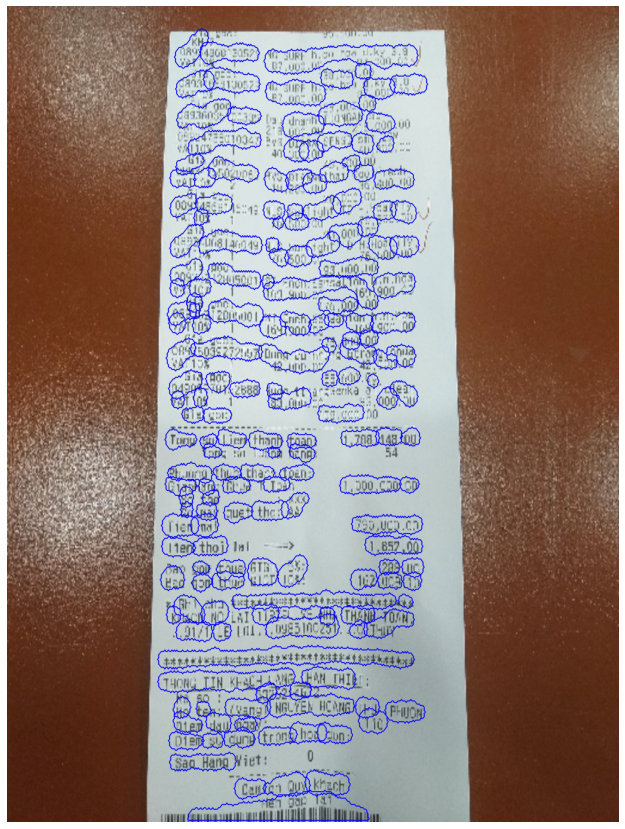

In [11]:
nu.imread_show(files[])